## Importações

In [10]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Leitura

In [13]:
spark = SparkSession.builder \
    .appName("AnaliseENEM") \
    .config("spark.driver.memory", "2g") \
    .getOrCreate()

leitura = spark.read.option("header", "true") \
               .option("sep", ";") \
               .option("encoding", "ISO-8859-1") \
               .option("inferSchema", "true") \
               .csv("data_raw/MICRODADOS_ENEM_2021.csv")

## Gráficos

### Gráfico 1

/tmp/ipykernel_32910/2178817496.py:14: FutureWarning:                           

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


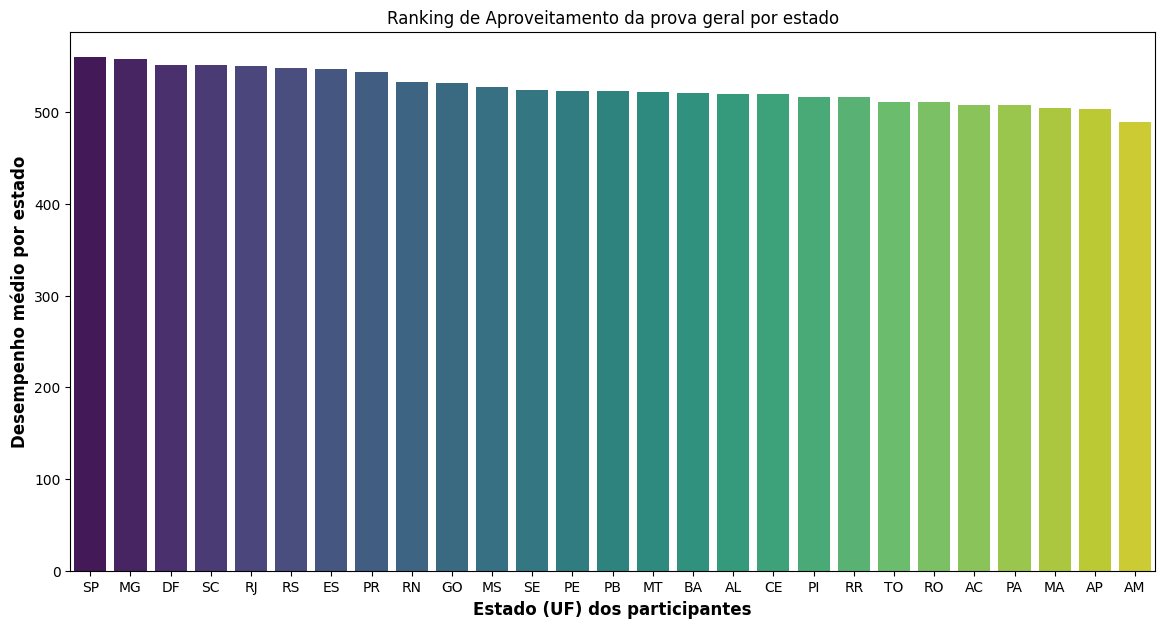

In [22]:

colunas_notas = ["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_REDACAO"]
comparacao_notas = leitura.select("SG_UF_PROVA", *colunas_notas)

comparacao_notas_media = comparacao_notas.withColumn("MEDIA_GERAL",
                                                     (col("NU_NOTA_CN") + col("NU_NOTA_CH") + col("NU_NOTA_LC") + 
                                                     col("NU_NOTA_MT") + col("NU_NOTA_REDACAO")) / 5
                                                    )
grafico_geral = comparacao_notas_media.groupBy("SG_UF_PROVA") \
                                      .avg("MEDIA_GERAL") \
                                      .toPandas()

plt.figure(figsize=(14, 7))

sns.barplot(
    data=grafico_geral, 
    x="SG_UF_PROVA", 
    y="avg(MEDIA_GERAL)", 
    order=grafico_geral.sort_values("avg(MEDIA_GERAL)", ascending=False)["SG_UF_PROVA"],
    palette="viridis"
)

plt.xlabel("Estado (UF) dos participantes", fontsize=12, fontweight='bold')
plt.ylabel("Desempenho médio por estado", fontsize=12, fontweight='bold')
plt.title("Ranking de Aproveitamento da prova geral por estado")
plt.show()


### Gráfico 2

In [ ]:
grafico_1 = leitura.select